In [1]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
df=pd.read_csv(r"D:\sohrab\AI\AI_requirement\BTC-USD.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [4]:
df.shape

(2713, 7)

In [5]:
closed=df[['Date','Close']]
closed

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2708,2022-02-15,44575.203125
2709,2022-02-16,43961.859375
2710,2022-02-17,40538.011719
2711,2022-02-18,40030.976563


In [6]:
prise2021=closed[closed['Date']>='2021-01-01']

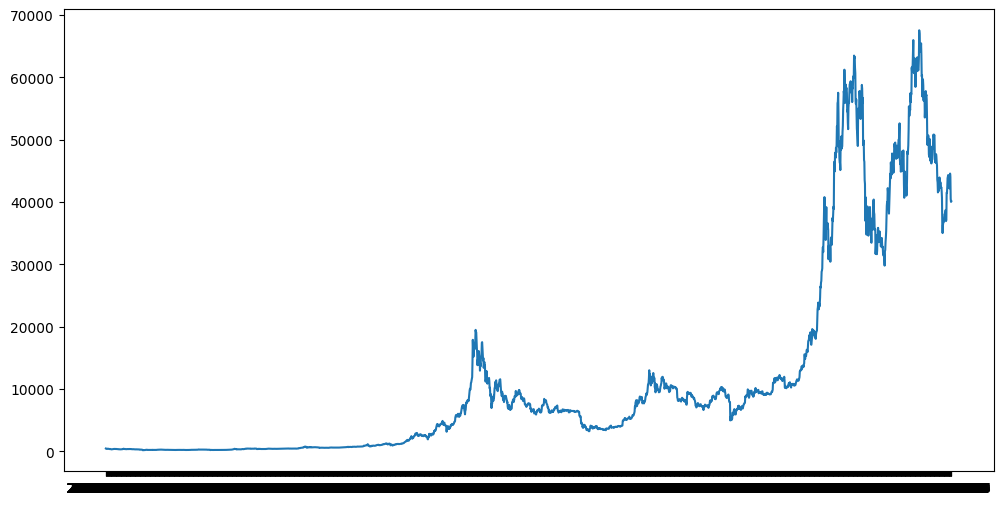

In [7]:
plt.figure(1,figsize=(12,6))
plt.plot(closed['Date'],closed['Close'])
plt.show()

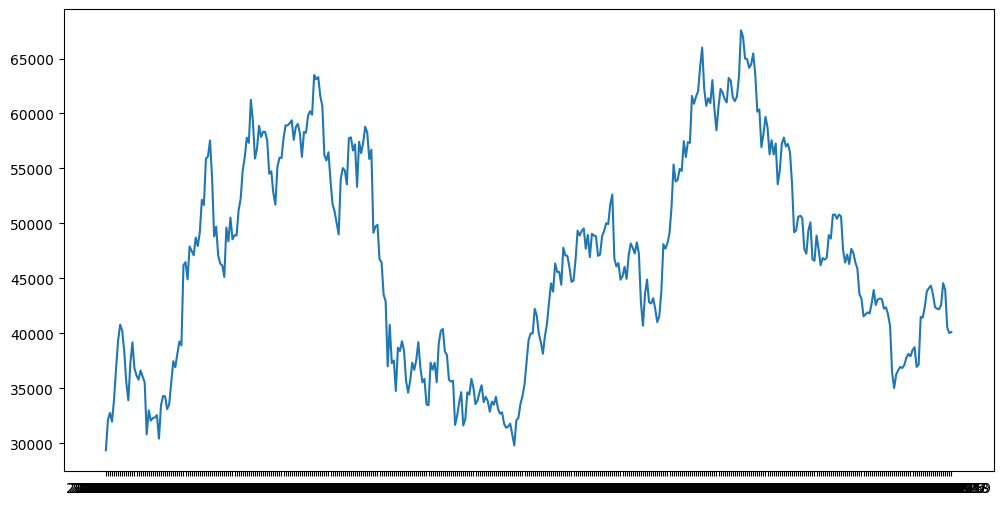

In [8]:
plt.figure(1,figsize=(12,6))
plt.plot(prise2021['Date'],prise2021['Close'])
plt.show()


In [9]:
Xt=prise2021['Close']

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(np.array(Xt).reshape(-1,1))
x

array([[0.        ],
       [0.0720849 ],
       [0.08922839],
       [0.06801727],
       [0.1209205 ],
       [0.1950691 ],
       [0.26174889],
       [0.29910073],
       [0.2848817 ],
       [0.23518355],
       [0.16213852],
       [0.11910159],
       [0.20795105],
       [0.25693868],
       [0.19509539],
       [0.17814903],
       [0.16801978],
       [0.18998202],
       [0.17531247],
       [0.1616435 ],
       [0.0380059 ],
       [0.09508654],
       [0.07052374],
       [0.07632947],
       [0.07834592],
       [0.08367304],
       [0.02771198],
       [0.10713953],
       [0.12940267],
       [0.12817565],
       [0.09792996],
       [0.10900057],
       [0.16066266],
       [0.21202855],
       [0.197732  ],
       [0.22962927],
       [0.25899886],
       [0.24950567],
       [0.44045912],
       [0.44791188],
       [0.40698985],
       [0.48530718],
       [0.47471665],
       [0.46426083],
       [0.50646194],
       [0.48624261],
       [0.5190974 ],
       [0.596

In [11]:
x.shape

(415, 1)

In [12]:
x_traint=x[0:332]
x_testt=x[332:]

In [13]:
print(x_traint.shape)
print(x_testt.shape)

(332, 1)
(83, 1)


In [14]:
x1=[]
y1=[]
a=[]
b=[]
for i in range(len(x_traint)-5-1):
    a=x_traint[i:i+5,0]
    b=x_traint[i+5]
    x1.append(a)
    y1.append(b)
x_train=np.array(x1)   
y_train=np.array(y1)
    






print(x_train.shape)


(326, 5)


In [24]:
x2 = []
y2 = []
for i in range(len(x_testt)-5-1):
    a = x_testt[i:i+5, 0]
    b = x_testt[i+5]
    x2.append(a)
    y2.append(b)

x_test = np.array(x2)
y_test = np.array(y2)

x_test = x_test.reshape(x_test.shape[0], 5, 1)


In [25]:
print(x1)
print('-----')
print(y1)

[array([0.        , 0.0720849 , 0.08922839, 0.06801727, 0.1209205 ]), array([0.0720849 , 0.08922839, 0.06801727, 0.1209205 , 0.1950691 ]), array([0.08922839, 0.06801727, 0.1209205 , 0.1950691 , 0.26174889]), array([0.06801727, 0.1209205 , 0.1950691 , 0.26174889, 0.29910073]), array([0.1209205 , 0.1950691 , 0.26174889, 0.29910073, 0.2848817 ]), array([0.1950691 , 0.26174889, 0.29910073, 0.2848817 , 0.23518355]), array([0.26174889, 0.29910073, 0.2848817 , 0.23518355, 0.16213852]), array([0.29910073, 0.2848817 , 0.23518355, 0.16213852, 0.11910159]), array([0.2848817 , 0.23518355, 0.16213852, 0.11910159, 0.20795105]), array([0.23518355, 0.16213852, 0.11910159, 0.20795105, 0.25693868]), array([0.16213852, 0.11910159, 0.20795105, 0.25693868, 0.19509539]), array([0.11910159, 0.20795105, 0.25693868, 0.19509539, 0.17814903]), array([0.20795105, 0.25693868, 0.19509539, 0.17814903, 0.16801978]), array([0.25693868, 0.19509539, 0.17814903, 0.16801978, 0.18998202]), array([0.19509539, 0.17814903, 0.

In [26]:
x_train=x_train.reshape(326,5,1)
x_test=x_testt.reshape(83,5,1)
print(x_train.shape)
print(x_test.shape)


ValueError: cannot reshape array of size 83 into shape (83,5,1)

In [ ]:
model=Sequential()
model.add(LSTM(10,activation='relu',input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(326, 5, 1)
(326, 1)
(77, 5, 1)
(77, 1)


In [ ]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
11/11 [==============================] - 1s 13ms/step - loss: 0.3272 - val_loss: 0.1372
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.2489 - val_loss: 0.0971
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1886 - val_loss: 0.0653
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1379 - val_loss: 0.0422
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0996 - val_loss: 0.0258
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0689 - val_loss: 0.0152
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0469 - val_loss: 0.0080
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.0044
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.0038
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0133 - val_loss: 0.0047
Epoch 11

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)
train_predict.shape,test_predict.shape

3/3 [==============================] - 0s 953us/step


((326, 1), (77, 1))

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
org_train=scaler.inverse_transform(y_train.reshape(-1,1))
org_test=scaler.inverse_transform(y_test.reshape(-1,1))


In [ ]:
print("asli",org_test[0])
print("robot",test_predict[0])

asli [49200.703125]
robot [55024.977]


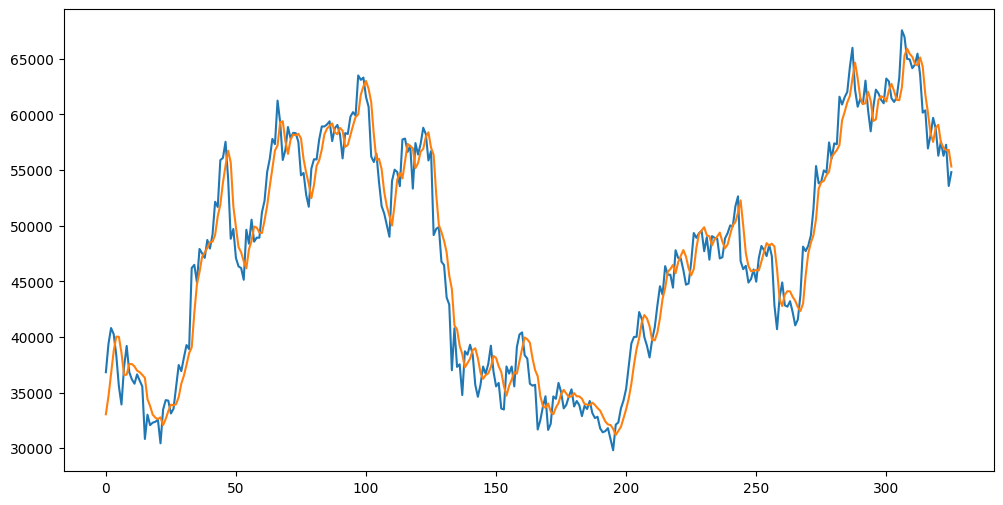

In [ ]:
plt.close()
plt.figure(1,(12,6))
plt.plot(org_train)
plt.plot(train_predict)


plt.show()

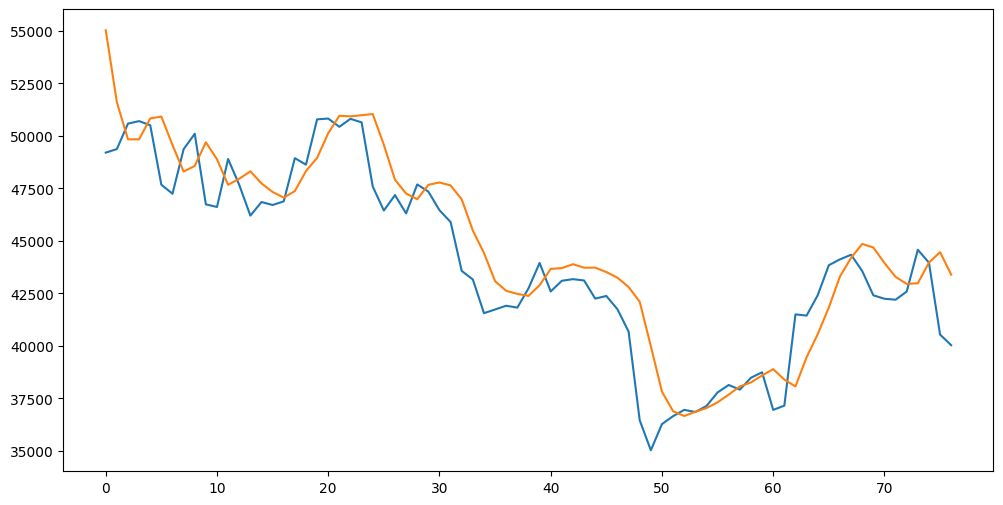

In [ ]:
plt.close()
plt.figure(1,(12,6))
plt.plot(org_test)
plt.plot(test_predict)


plt.show()